In [1]:
import tradingeconomics as te
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
te.login('jupyter:jupyter'); # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

In [3]:

raw_forecast = te.getForecastData(country= ['united states'], indicator=['GDP Annual Growth Rate'],output_type='df')

final_date = raw_forecast.iloc[0]['LatestValueDate']
dt = datetime.strptime(final_date, '%Y-%m-%dT%H:%M:%S')
dt= f"{dt.year}-{dt.month}-{dt.day}"

raw_gdp = te.getHistoricalData(country='united states', indicator='GDP Annual Growth Rate', initDate='2015-01-01', endDate=dt, output_type='df')


In [4]:
historical_gdp= raw_gdp[['DateTime','Value']].rename(columns = {'Value': 'Inflation Rate'})
historical_gdp['Date'] = pd.DatetimeIndex(historical_gdp['DateTime'])
historical_gdp.set_index('Date', inplace=True)
del historical_gdp['DateTime']

dict_forecast = {
    'DateTime':
            [
                raw_forecast['q1_date'].values[0],
                raw_forecast['q2_date'].values[0],
                raw_forecast['q3_date'].values[0],
                raw_forecast['q4_date'].values[0]
            ], 
    'Forecast':
            [
                raw_forecast['q1'].values[0],
                raw_forecast['q2'].values[0],
                raw_forecast['q3'].values[0],
                raw_forecast['q4'].values[0]
            ]
}
df_forecast = pd.DataFrame(data=dict_forecast)
df_forecast['Date'] = pd.DatetimeIndex(df_forecast['DateTime'])
df_forecast.set_index('Date', inplace=True)
del df_forecast['DateTime']

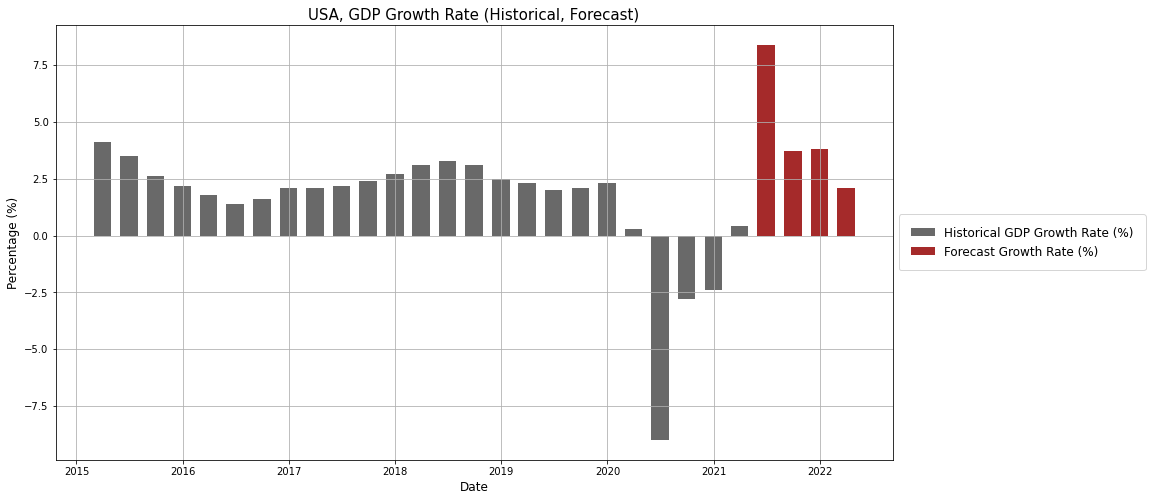

In [5]:
labels_historical = historical_gdp.index.tolist()
values_historical = historical_gdp['Inflation Rate'].values.tolist()


labels_forecast = df_forecast.index.tolist()
values_forecast = df_forecast['Forecast'].values.tolist()

width = 60

fig, ax = plt.subplots(figsize=(15, 8))
 
ax.bar(labels_historical, values_historical, width, label='Historical GDP Growth Rate (%)',color='dimgrey')
ax.bar(labels_forecast, values_forecast, width, label='Forecast Growth Rate (%)',color='brown')

plt.legend(
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12,
          ncol=1,
          title_fontsize=14,
          borderpad=1)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("USA, GDP Growth Rate (Historical, Forecast)", fontsize=15)

plt.grid()
plt.show()